In [25]:
#importing necessary libraries
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import pandas as pd
import matplotlib as plt


from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls

drive  sample_data


In [3]:
!ls /content/drive/MyDrive/sign_mnist_test.csv
!ls /content/drive/MyDrive/sign_mnist_train.csv

/content/drive/MyDrive/sign_mnist_test.csv
/content/drive/MyDrive/sign_mnist_train.csv


In [4]:
#Loading the Training and Testing data
train = pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")
test = pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [30]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [31]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [33]:
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [34]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [35]:
#Checking for any missing data
train.isnull().sum()
test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

# Processing the images

In [5]:
Y_train = train["label"] #Y for training data
X_train = train.drop(labels = ["label"],axis = 1) #X for training data

In [6]:
Y_test = test["label"] #Y for test data
X_test = test.drop(labels = ["label"],axis = 1) #X for test data

In [7]:
#Scaling the images, converting the range of pixel from 0-255 to 0-1 because this will allow the neural network to converge quicker
X_train = X_train / 255
X_test = X_test / 255

In [8]:
#Reshaping to 28x28 and the images are greyscale so channel 1
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(7172, 28, 28, 1)
(27455, 28, 28, 1)


In [9]:
import seaborn as sns
#Training labels
labels = train['label'].values

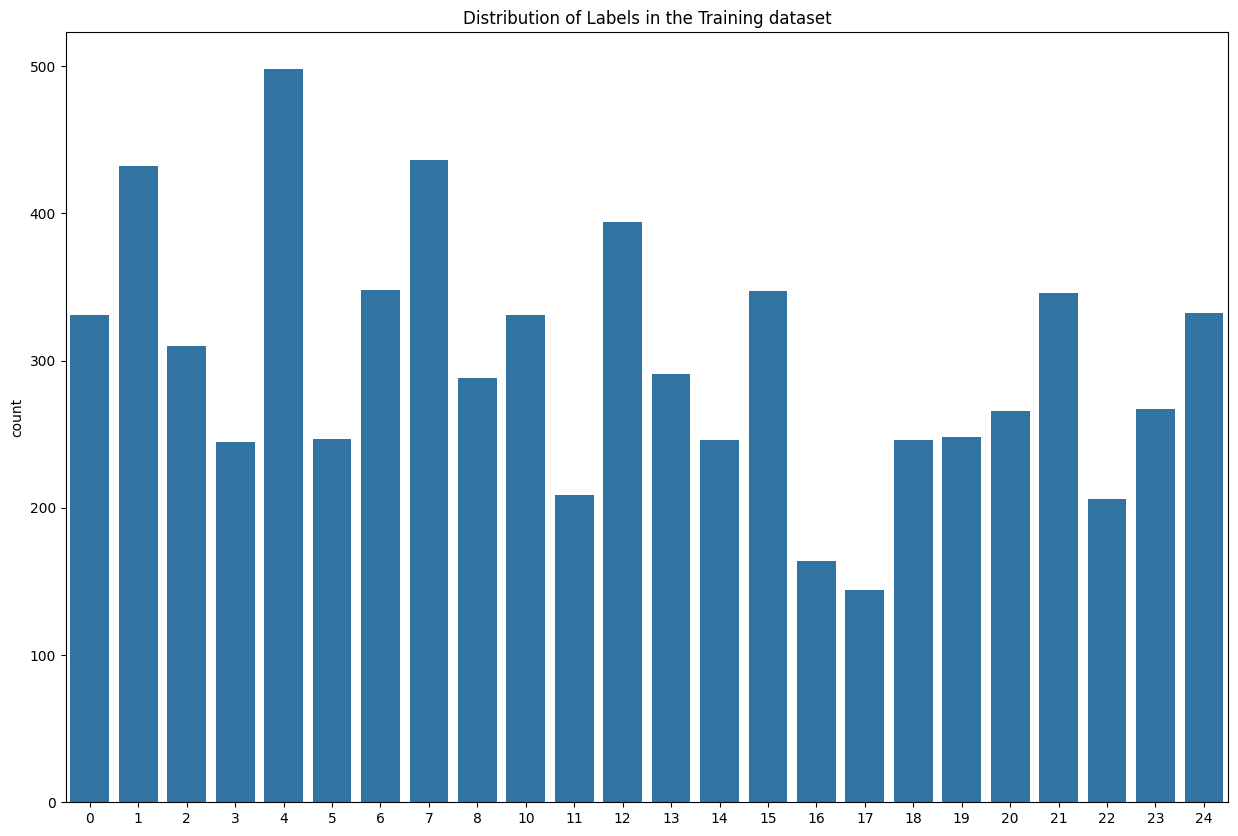

In [10]:
import matplotlib.pyplot as plt
#Frequency plot of the  in training data
plt.figure(figsize=(15,10))
plt.title("Distribution of Labels in the Training dataset")
sns.countplot(x = labels)
plt.show()

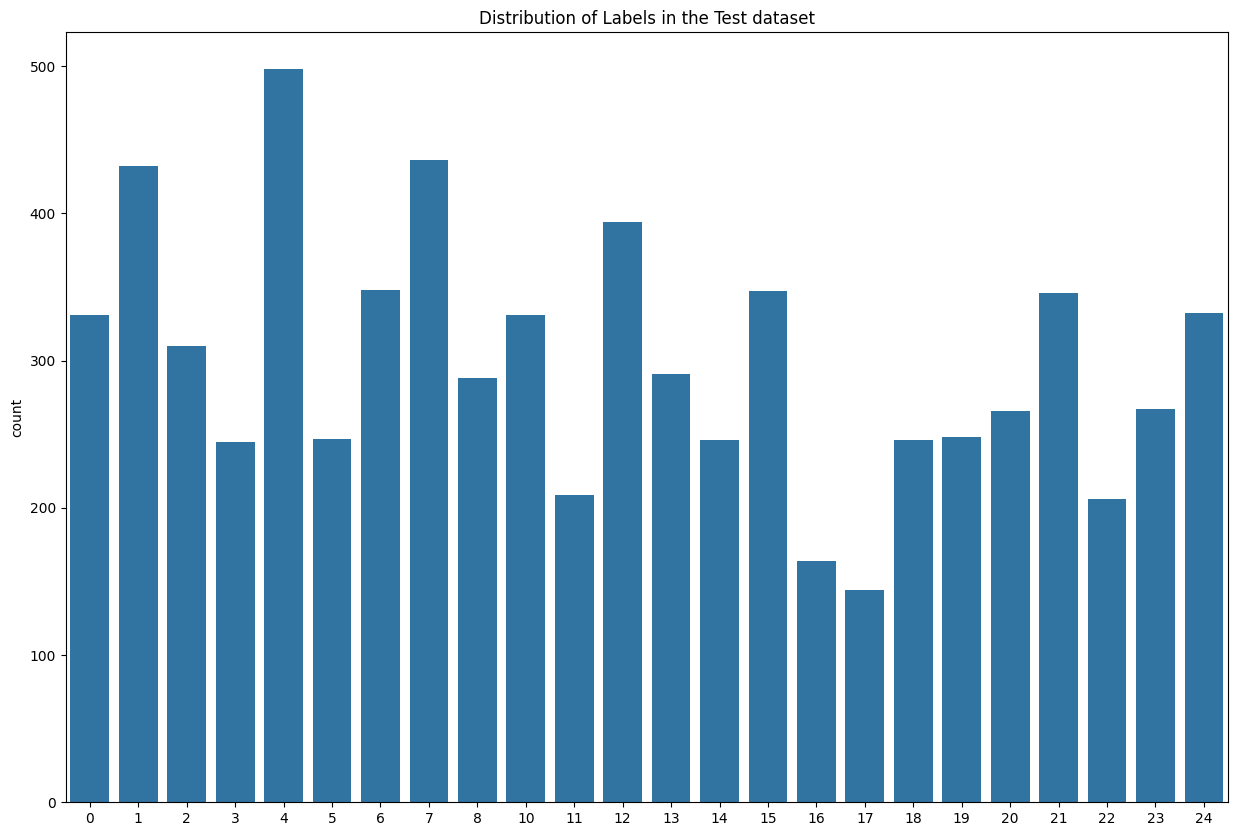

In [11]:
import matplotlib.pyplot as plt
#Frequency plot of the  in test data
plt.figure(figsize=(15,10))
plt.title("Distribution of Labels in the Test dataset")
sns.countplot(x = labels)
plt.show()

# **Viewing images**

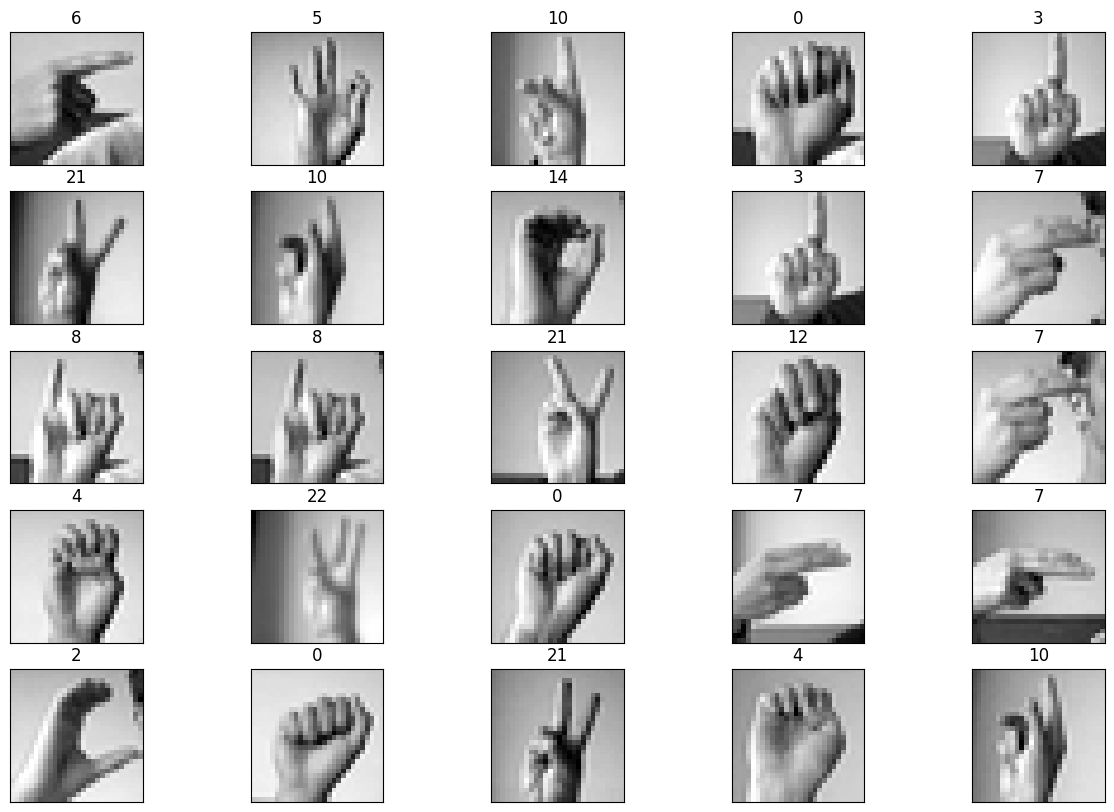

In [12]:
#displaying a 5x5 grid of the first 25 images in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(Y_train[i])
plt.show()

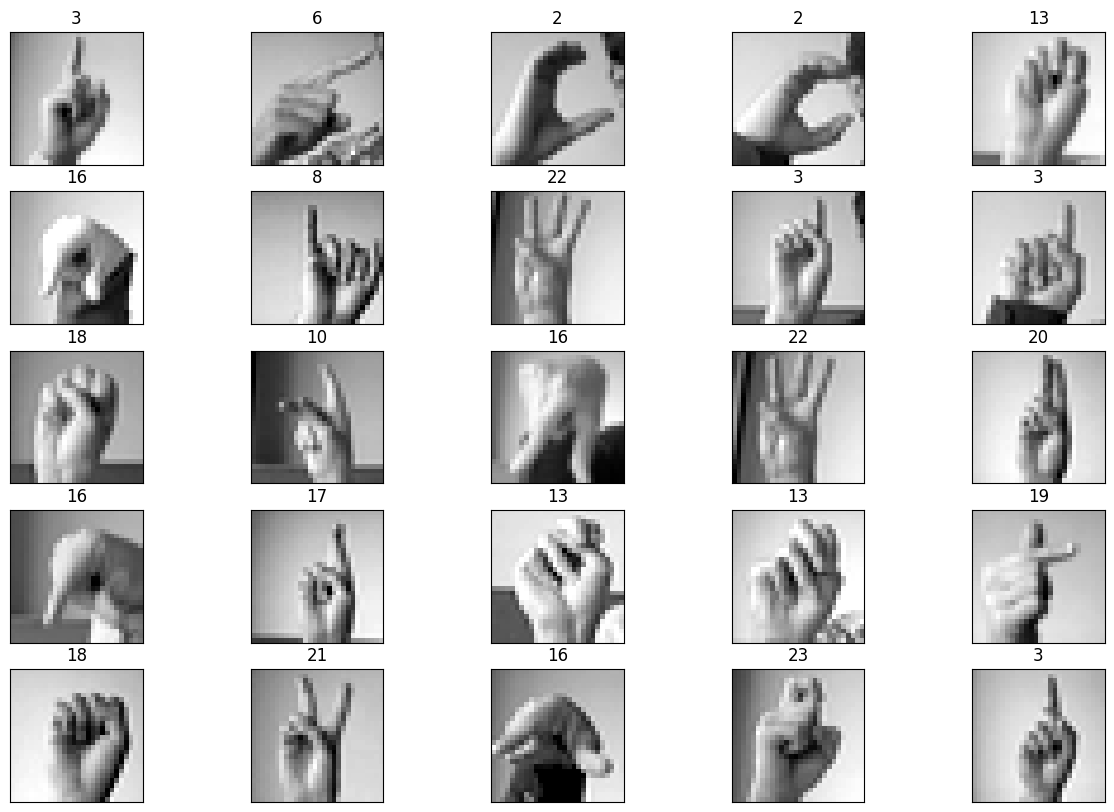

In [13]:
#displaying a 5x5 grid of the first 25 images in the test images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(Y_test[i])
plt.show()

# **CNN model**

In [14]:
#spliting the training images into the images used for training and validating the model
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=7)

In [15]:
#the shapes of the train, validate, and test images
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(5020, 28, 28, 1)
(5020,)
(2152, 28, 28, 1)
(2152,)
(27455, 28, 28, 1)
(27455,)


In [16]:
model = keras.Sequential([

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
#Model Training
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=50,
    verbose=2,
    shuffle = 1
)

Epoch 1/50
40/40 - 15s - loss: 3.6252 - accuracy: 0.0484 - val_loss: 3.2432 - val_accuracy: 0.0669 - 15s/epoch - 386ms/step
Epoch 2/50
40/40 - 9s - loss: 3.2168 - accuracy: 0.0922 - val_loss: 3.2292 - val_accuracy: 0.0669 - 9s/epoch - 224ms/step
Epoch 3/50
40/40 - 9s - loss: 3.0392 - accuracy: 0.1375 - val_loss: 3.2300 - val_accuracy: 0.0809 - 9s/epoch - 219ms/step
Epoch 4/50
40/40 - 12s - loss: 2.8743 - accuracy: 0.1721 - val_loss: 3.2699 - val_accuracy: 0.1148 - 12s/epoch - 309ms/step
Epoch 5/50
40/40 - 8s - loss: 2.6472 - accuracy: 0.2315 - val_loss: 3.3357 - val_accuracy: 0.0818 - 8s/epoch - 188ms/step
Epoch 6/50
40/40 - 11s - loss: 2.4016 - accuracy: 0.2865 - val_loss: 3.3384 - val_accuracy: 0.0850 - 11s/epoch - 266ms/step
Epoch 7/50
40/40 - 10s - loss: 2.1074 - accuracy: 0.3677 - val_loss: 3.0171 - val_accuracy: 0.1506 - 10s/epoch - 255ms/step
Epoch 8/50
40/40 - 9s - loss: 1.8017 - accuracy: 0.4384 - val_loss: 2.5179 - val_accuracy: 0.2481 - 9s/epoch - 217ms/step
Epoch 9/50
40/40

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                        

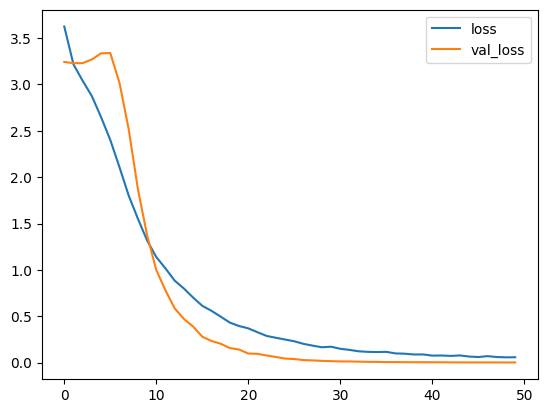

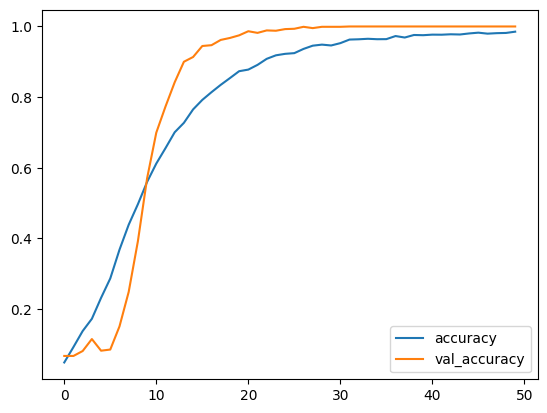

In [20]:
#Viewing the training results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [21]:
test_eval = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5413970947265625
Test accuracy: 0.8563831448554993


In [23]:
#Evaluating the model accuarcy
loss,accuracy = model.evaluate(X_test,Y_test,verbose=0)
print('the accuracy is',accuracy*100,'%')


the accuracy is 85.63831448554993 %


In [30]:
#creating the predictions using the test pixel values
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)

#creating a report that displays how predictions compare with actual values
print(classification_report(Y_test, predictions))

858/858 [==============================] - 16s 17ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1126
           1       0.93      0.99      0.96      1010
           2       0.85      0.97      0.91      1144
           3       0.67      0.96      0.79      1196
           4       0.81      1.00      0.90       957
           5       0.96      0.88      0.92      1204
           6       0.94      0.90      0.92      1090
           7       0.88      0.99      0.93      1013
           8       0.95      0.92      0.93      1162
          10       0.68      0.95      0.79      1114
          11       0.98      0.74      0.84      1241
          12       0.69      0.95      0.80      1055
          13       0.87      0.71      0.79      1151
          14       0.80      0.78      0.79      1196
          15       0.95      0.93      0.94      1088
          16       1.00      0.84      0.91      1279
          17       0.90 